In [9]:
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


# Load InSAR CSV file

In [10]:
%%time
loc1 = r"sentinel1_asc_t088_limburg.csv"

insar_data = pd.read_csv(loc1, sep=',')
display(insar_data.head())

,Unnamed: 0,pnt_id,pnt_flags,pnt_lat,pnt_lon,pnt_line,pnt_pixel,pnt_height,pnt_demheight,pnt_demheight_highres,...,d_20220713,d_20220725,d_20220806,d_20220818,d_20220830,d_20220911,d_20220923,d_20221005,d_20221017,d_20221029
0,8666284,L00012395P00030381,11,50.830029,6.035176,12395,30381,215.67052,221.34067,221.34067,...,0.00017,-0.00903,-0.00341,-0.00538,0.00226,0.00216,0.00246,0.00505,-0.00143,0.00755
1,8667671,L00012396P00030366,101,50.830063,6.034464,12396,30366,222.71645,218.97993,218.97993,...,-0.00405,0.00065,-0.00606,-0.00593,-0.00331,-0.00459,-0.00510,-0.01321,-0.00378,-0.00928
2,8667672,L00012396P00030367,101,50.830044,6.034565,12396,30367,224.24109,219.15625,219.15625,...,-0.00677,-0.00200,-0.00853,-0.00908,-0.00586,-0.00763,-0.01031,-0.01234,-0.00587,-0.01151
3,8667673,L00012396P00030368,101,50.830071,6.034538,12396,30368,222.49604,219.33257,219.33257,...,-0.00430,0.00108,-0.00560,-0.00628,-0.00352,-0.00579,-0.00590,-0.01655,-0.00313,-0.00861
4,8667674,L00012396P00030369,101,50.830078,6.034555,12396,30369,220.54963,219.50887,219.50887,...,-0.00330,0.00158,-0.00489,-0.00538,-0.00317,-0.00518,-0.00550,-0.01635,-0.00192,-0.00798


CPU times: total: 13.6 s
Wall time: 14.1 s


In [11]:
%%time
loc2 = r"sentinel1_dsc_t037_limburg.csv"

insar_data = pd.read_csv(loc2, sep=',')
display(insar_data.head())

,Unnamed: 0,pnt_id,pnt_flags,pnt_lat,pnt_lon,pnt_line,pnt_pixel,pnt_height,pnt_demheight,pnt_demheight_highres,...,d_20220628,d_20220722,d_20220803,d_20220815,d_20220827,d_20220908,d_20220920,d_20221002,d_20221014,d_20221026
0,45198734,L00021513P00024254,101,51.069912,5.995160,21513,24254,100.53586,97.83295,97.83295,...,0.01459,-0.00443,0.00093,-0.00054,-0.00311,0.00168,0.01236,0.01460,0.00581,0.00538
1,45198735,L00021513P00024256,101,51.069924,5.995082,21513,24256,98.46797,97.63007,97.63007,...,-0.01331,-0.00236,-0.00357,0.00086,-0.00067,0.00045,-0.00715,0.00031,-0.00287,-0.00185
2,45198736,L00021513P00024258,101,51.069936,5.994990,21513,24258,98.23861,97.41656,97.41656,...,-0.01074,-0.00592,-0.00472,-0.00390,-0.00323,-0.00274,-0.00590,-0.00123,-0.00536,-0.00382
3,45198737,L00021513P00024266,101,51.069983,5.994527,21513,24266,96.72467,94.12607,94.12607,...,-0.00856,-0.00937,-0.00488,-0.00397,-0.00548,-0.00839,-0.00653,-0.00698,-0.01129,-0.00860
4,45198740,L00021513P00024270,101,51.069988,5.994491,21513,24270,90.49152,94.05100,94.05100,...,-0.00734,-0.00843,-0.00508,-0.00547,-0.00519,-0.00560,-0.00642,-0.00539,-0.01000,-0.00912


CPU times: total: 13.3 s
Wall time: 13.3 s


In [12]:
# Display all columns from the csv file to see all information that is in the .csv file
print(insar_data.columns.tolist())

['Unnamed: 0', 'pnt_id', 'pnt_flags', 'pnt_lat', 'pnt_lon', 'pnt_line', 'pnt_pixel', 'pnt_height', 'pnt_demheight', 'pnt_demheight_highres', 'pnt_geoid', 'pnt_incidangle', 'pnt_enscoh', 'pnt_ampconsist', 'pnt_quality', 'pnt_linear', 'pnt_quadratic', 'pnt_seasonal_cos', 'pnt_seasonal_sin', 'pnt_ds_nr_neighbors', 'd_20171004', 'd_20171016', 'd_20171028', 'd_20171109', 'd_20171121', 'd_20171203', 'd_20171215', 'd_20171227', 'd_20180108', 'd_20180120', 'd_20180201', 'd_20180213', 'd_20180225', 'd_20180309', 'd_20180321', 'd_20180402', 'd_20180414', 'd_20180426', 'd_20180508', 'd_20180520', 'd_20180601', 'd_20180613', 'd_20180625', 'd_20180707', 'd_20180719', 'd_20180731', 'd_20180812', 'd_20180824', 'd_20180905', 'd_20180917', 'd_20180929', 'd_20181011', 'd_20181023', 'd_20181104', 'd_20181116', 'd_20181128', 'd_20181222', 'd_20190103', 'd_20190115', 'd_20190127', 'd_20190208', 'd_20190220', 'd_20190304', 'd_20190316', 'd_20190328', 'd_20190409', 'd_20190421', 'd_20190503', 'd_20190515', '

In [13]:
# Extract the dates from the .csv file
dates = pd.to_datetime(insar_data.filter(regex='^d_20').columns, format='d_%Y%m%d')

# Extract the displacement data from the .csv file
displacement_data = insar_data.filter(regex='^d_20')


In [14]:
# Calculate the nr of days between the observations where the first observations is day 0
days = (dates- dates[0]).days
years = days/365


Text(0, 0.5, 'Latitude')

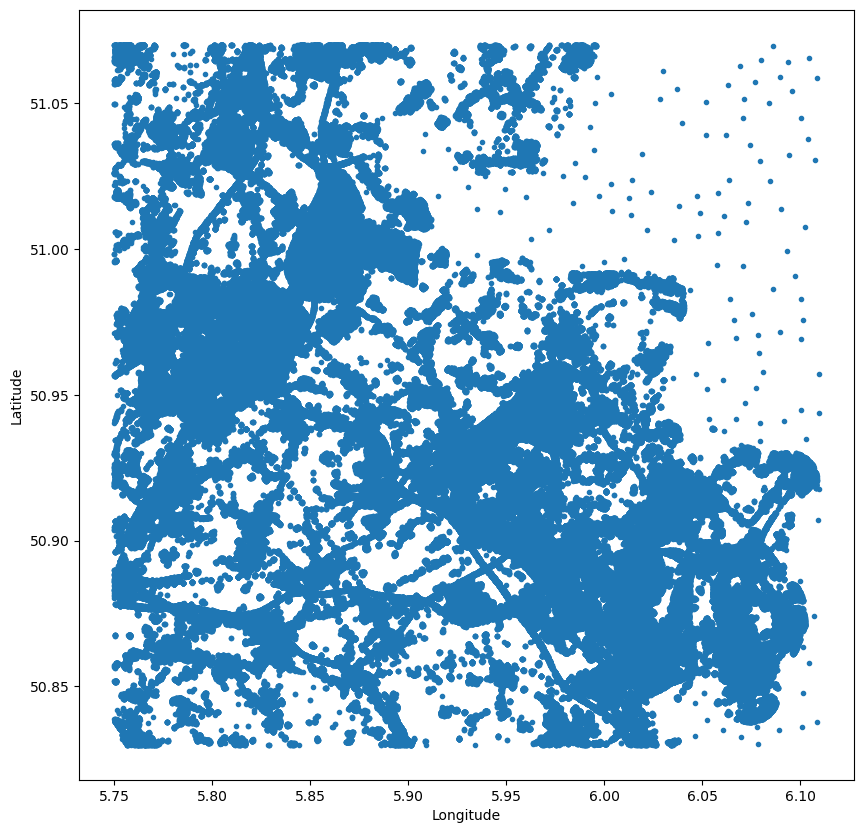

In [15]:
# Plot the location of the points
plt.figure(figsize = (10,10))
plt.plot(insar_data.pnt_lon, insar_data.pnt_lat, '.')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Text(0.5, 0, 'Date')

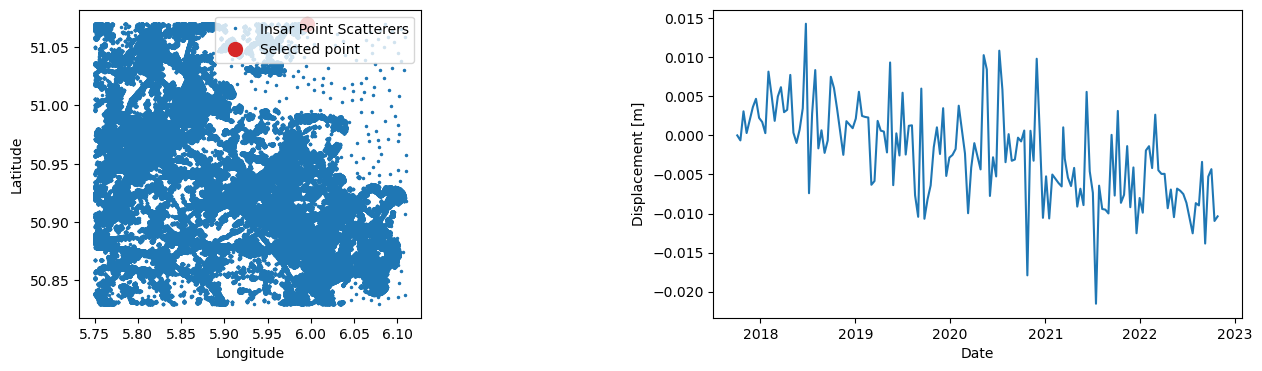

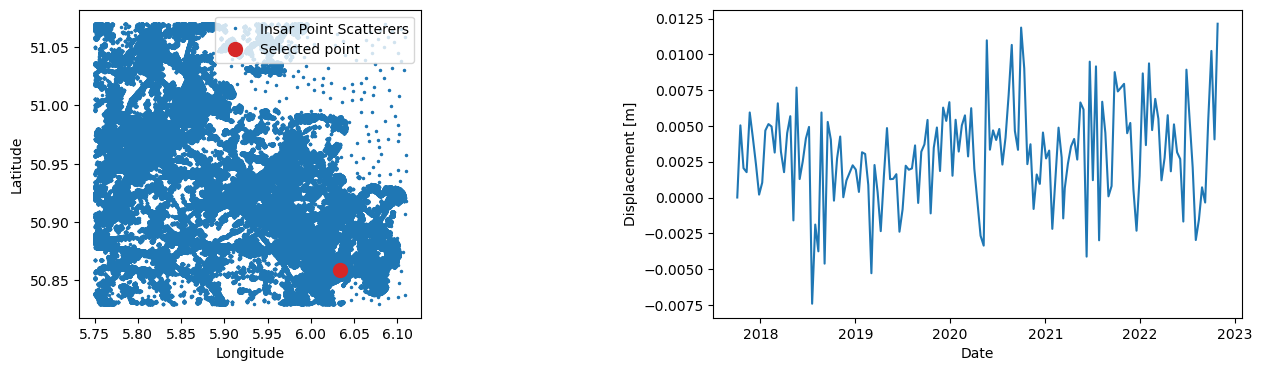

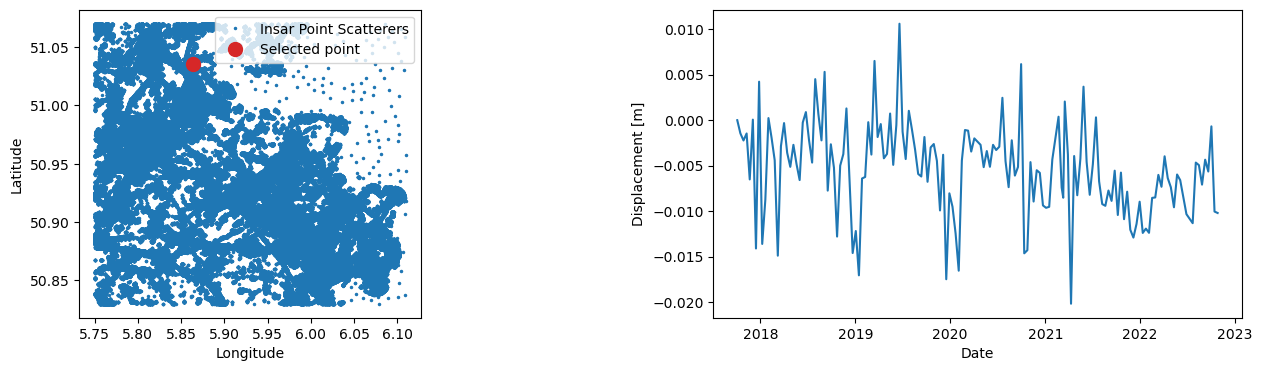

In [16]:
# Plot a timeseries

# Change the pnt_indx value to plot another time series
pnt_idx = 20

plt.figure(figsize = (15,4))
plt.subplot(131)
plt.plot(insar_data.pnt_lon, insar_data.pnt_lat, '.', label = 'Insar Point Scatterers', markersize = 3)
plt.plot(insar_data.pnt_lon.iloc[pnt_idx], insar_data.pnt_lat.iloc[pnt_idx], '.', 
         color = 'tab:red', markersize = 20, label = 'Selected point')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

plt.subplot(122)
plt.plot(dates, displacement_data.iloc[pnt_idx, :])
plt.ylabel('Displacement [m]')
plt.xlabel('Date')


# Change the pnt_indx value to plot another time series
pnt_idx = 945445

plt.figure(figsize = (15,4))
plt.subplot(131)
plt.plot(insar_data.pnt_lon, insar_data.pnt_lat, '.', label = 'Insar Point Scatterers', markersize = 3)
plt.plot(insar_data.pnt_lon.iloc[pnt_idx], insar_data.pnt_lat.iloc[pnt_idx], '.', 
         color = 'tab:red', markersize = 20, label = 'Selected point')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

plt.subplot(122)
plt.plot(dates, displacement_data.iloc[pnt_idx, :])
plt.ylabel('Displacement [m]')
plt.xlabel('Date')



# Change the pnt_indx value to plot another time series
pnt_idx = 76432

plt.figure(figsize = (15,4))
plt.subplot(131)
plt.plot(insar_data.pnt_lon, insar_data.pnt_lat, '.', label = 'Insar Point Scatterers', markersize = 3)
plt.plot(insar_data.pnt_lon.iloc[pnt_idx], insar_data.pnt_lat.iloc[pnt_idx], '.', 
         color = 'tab:red', markersize = 20, label = 'Selected point')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

plt.subplot(122)
plt.plot(dates, displacement_data.iloc[pnt_idx, :])
plt.ylabel('Displacement [m]')
plt.xlabel('Date')